In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# 'confirmed', 'deaths', 'recovered', 'recovery', 'mortality'
series_category = 'recovery'
history = pd.read_csv('output/step_one/'+series_category+'/' + 'history.csv', index_col=0)
median = pd.read_csv('output/step_one/'+series_category+'/' + 'median.csv', index_col=0)
quantile10 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile10.csv', index_col=0)
quantile90 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile90.csv', index_col=0)
quantile35 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile35.csv', index_col=0)
quantile65 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile65.csv', index_col=0)

history.index = pd.to_datetime(history.index)
median.index = pd.to_datetime(median.index)
quantile10.index = pd.to_datetime(quantile10.index)
quantile90.index = pd.to_datetime(quantile90.index)
quantile35.index = pd.to_datetime(quantile35.index)
quantile65.index = pd.to_datetime(quantile65.index)

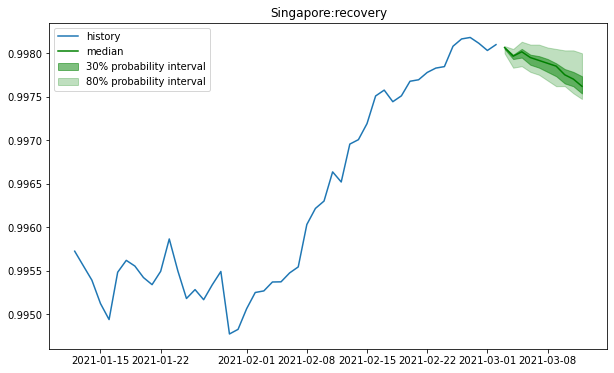

In [23]:
country = 'Singapore'
color = 'green'
plt.figure(figsize=(10,6))
plt.plot(history[country].iloc[-50:], '-', label='history')
plt.plot(median[country], color=color, label='median')
plt.fill_between(quantile35[country].index,quantile35[country],quantile65[country],color=color, alpha=0.5, label='30% probability interval')
plt.fill_between(quantile10[country].index,quantile10[country],quantile90[country],color=color, alpha=0.25, label='80% probability interval')
plt.title(country + ':' + series_category)
plt.legend(loc='upper left')